<a href="https://colab.research.google.com/github/Ignacio-Ibarra/NLP-Disasters/blob/master/VERSION%20FINAL/TP%202/Modelos/LSTM/Using%20Data%20Augmentation/LSTM_Data_Augmentation_synonym_replacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We're going to implement a data augmentation via random synonyms replacement of any word in each sentence. 

# Libraries

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Reading CSV files

In [ ]:
x_train = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/x_train_cleaned.csv', 
                    usecols = ['text_cleaned','location_cleaned','keyword_cleaned'])
x_test = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/x_test_cleaned.csv',
                    usecols = ['text_cleaned','location_cleaned','keyword_cleaned'])
id_test = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/x_test_cleaned.csv',
                    usecols = ['id'])
y_train = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/y_train_cleaned.csv')

In [ ]:
len(x_train) 

6879

In [ ]:
x_train['text_cleaned'] = x_train['text_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))
x_train['keyword_cleaned'] = x_train['keyword_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))
x_train['location_cleaned'] = x_train['location_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))

x_test['text_cleaned'] = x_test['text_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))
x_test['keyword_cleaned'] = x_test['keyword_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))
x_test['location_cleaned'] = x_test['location_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))

# Data Augmentation

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
import random

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We will get another sentence for every sentence we have. 

In [ ]:
text = 'we will get another sentence for every sentence we have'
synonym_replacement(text,2)

['we', 'will', 'get', 'another', 'sentence', 'for', 'every', 'sentence', 'we', 'have']
random list:  ['every', 'another', 'get', 'sentence']
random list post-shuffle : ['get', 'sentence', 'every', 'another']
get
synonym:  convey
sentence
synonym:  prison term


'we will convey another prison term for every prison term we have'

Uy funciona muuuy mal

## Using pre-trained vectors to obtain similarity

In [ ]:
import numpy as np

!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-08-02 22:07:16--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.96.62
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.96.62|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
!pip install gensim
from gensim.models import KeyedVectors

In [ ]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz' # from above
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
word2vec.vocab

{'</s>': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7940>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7a20>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7a90>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7b00>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7b70>,
 'on': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7be0>,
 '##': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7c50>,
 'The': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7cc0>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7d30>,
 'said': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7da0>,
 'was': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7e10>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7e80>,
 'at': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7ef0>,
 'not': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7f60>,
 'as': <gensim.models.keyedvectors.Vocab at 0x7f97fdcd7fd0>,
 'it': <gensim.models.keyedvectors.Vocab at 0x7f97fdce5080>,
 'be': <gen

In [ ]:
# def get_synonyms(word):
#     """
#     Get synonyms of a word
#     """
#     synonyms = set()
    
#     for syn in wn.synsets(word): 
#         for l in syn.lemmas(): 
#             synonym = l.name().replace("_", " ").replace("-", " ").lower()
#             synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
#             synonyms.add(synonym) 
    
#     if word in synonyms:
#         synonyms.remove(word)
    
#     return list(synonyms)

In [ ]:
wn_lemma = set(wn.all_lemma_names())
w2vocab = set(word2vec.vocab)
# def get_synonyms2(word,number_syns): 
#   output = []
#   if word in w2vocab: 
#     syn_list =  [syn for syn,similarity in word2vec.most_similar(word)]
#     output_lenght = 0
#     for i in range(len(syn_list)): 
#       if syn_list[i] in wn_lemma:
#         output.append(syn_list[i])
#         output_lenght += 1
#       if output_lenght >= number_syns:
#         break
#   return output


# def synonym_replacement2(number_syns, number_replacements, inicio, fin):
    
#     for in in range(inicio, fin): 
      
#       words = words.split()
      
#       new_words = words.copy()
#       random_word_list = list(set([word for word in words if word not in stopwords.words('english')]))
      
#       random.shuffle(random_word_list)
      
#       num_replaced = 0
      
#       for random_word in random_word_list:
#           if num_replaced >= number_replacements:
#             break
          
#           if get_synonyms2(random_word, number_syns) != []:
                        
#             synonym = random.choice(get_synonyms2(random_word, number_syns))
#             synonym = re.sub('_',' ',synonym)
#             synonym = re.sub('[@#!:?]','',synonym)
#             new_words = [synonym.lower() if word == random_word else word for word in new_words]
#             num_replaced += 1
            
#       sentence = ' '.join(new_words)

#       return sentence

In [ ]:
#let's see how it works and the time of execution. 

import time
samples = x_train.text_cleaned.sample(5).tolist()
start = time.time()
for i in range(len(samples)):
  print(samples[i],'\n',synonym_replacement2(samples[i],4,2),'\n','***'*75)
print('If I run this code i would spent {} hours'.format((time.time() - start)*7000/(5*3600)))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


liked couture video benedict cumberbatch gets video bombed 
 liked couturier video benedict cumberbatch gets video bombing 
 *********************************************************************************************************************************************************************************************************************************
soon maintenance ends everyone floods servers servers destroyed extreme load maintenance starts anew 
 soon maintenance ends everyone floods servers servers demolished severe load maintenance starts anew 
 *********************************************************************************************************************************************************************************************************************************
would trapped collapsed circus tent bunch clowns 
 would stuck collapsed circus tent slew clowns 
 **********************************************************************************************************************

We're going to exectue the function above by threads

In [ ]:
#Threading
import threading

#Serie to list
text_list = x_train.text_cleaned.tolist()

#Fijamos la cantidad de hilos
n_threads = 16

In [ ]:
#Vamos a determinar la cantidad de elementos que va a tener que analizar cada thread. 
p=len(text_list)//n_threads # Acá hacemos división entera para que me divida la cantidad de elementos en n partes iguales.
inicios = []
fines = []
inicio=0
fin=p

#Acá vamos a crear los inicios y los fines. 
for i in range(n_threads):
  inicios.append(inicio)
  fines.append(fin)
  inicio= inicio + p 
  fin= fin + p

#Print de inicios y fines
print(inicios)
print(fines)

[0, 429, 858, 1287, 1716, 2145, 2574, 3003, 3432, 3861, 4290, 4719, 5148, 5577, 6006, 6435]
[429, 858, 1287, 1716, 2145, 2574, 3003, 3432, 3861, 4290, 4719, 5148, 5577, 6006, 6435, 6864]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
def get_synonyms2(word,number_syns): 
  output = []
  if word in w2vocab: 
    syn_list =  [syn for syn,similarity in word2vec.most_similar(word)]
    output_lenght = 0
    for i in range(len(syn_list)): 
      if syn_list[i] in wn_lemma:
        output.append(syn_list[i])
        output_lenght += 1
      if output_lenght >= number_syns:
        break
  return output


def synonym_replacement3(number_syns, number_replacements, inicio, fin):
    lista = []
    for i in range(inicio, fin): 
      
      words = text_list[i].split()
      
      new_words = words.copy()
      random_word_list = list(set([word for word in words if word not in stopwords.words('english')]))
      
      random.shuffle(random_word_list)
      
      num_replaced = 0
      
      for random_word in random_word_list:
          if num_replaced >= number_replacements:
            break
          
          if get_synonyms2(random_word, number_syns) != []:
                        
            synonym = random.choice(get_synonyms2(random_word, number_syns))
            synonym = re.sub('_',' ',synonym)
            synonym = re.sub('[@#!:?]','',synonym)
            new_words = [synonym.lower() if word == random_word else word for word in new_words]
            num_replaced += 1
            
      lista.append(' '.join(new_words))

    return lista

In [ ]:
t0=time.time()
threads=[]
for i in range(len(inicios)):
  t=threading.Thread(target=synonym_replacement3, args=(4,2,inicios[i], fines[i],))
  threads.append(t)
  t.start()

for t in threads:
  t.join()
  print(t)

tf=time.time() - t0

print(tf)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
data = np.array(lista)
fake_text = pd.Series(data)
fake_text.to_csv('fake_text.csv',index=False)
files.download('fake_text.csv')

# Tokenizer

In [ ]:
pd.set_option('max_colwidth', 200)
(x_train['text_cleaned'] + (' ') + x_train['keyword_cleaned'] + (' ') + x_train['location_cleaned']).head()

0                                                deeds reason earthquake may allah forgive us keyword location
1                                                        forest fire near la range ask canada keyword location
2    residents asked shelter place notified officers evacuation shelter place orders expected keyword location
3                                  13000 people receive wildfire evacuation orders california keyword location
4                                      got sent photo ruby alaska smoke wildfire pours school keyword location
dtype: object

## Instantiating the Tokenizer

In [ ]:
#Top word is the quantity of differents words that our word_index will have. 
top_word = 35000

In [ ]:
#Here we instantiate the tokenizer
tokenizer = Tokenizer(num_words=top_word)

#Here we make the fit we three features that are strings
tokenizer.fit_on_texts((x_train['text_cleaned'] + (' ') + x_train['keyword_cleaned'] + (' ') + x_train['location_cleaned']))

## Text to sequences of word_indexes

Converting the text into a sequence of integers, all of them are indexes of the tokenizer.word_index

In [ ]:
#Training set to sequence
x_train_txt = tokenizer.texts_to_sequences(x_train['text_cleaned'])
x_train_key = tokenizer.texts_to_sequences(x_train['keyword_cleaned'])
x_train_loc = tokenizer.texts_to_sequences(x_train['location_cleaned'])

#Test set to sequence
x_test_txt = tokenizer.texts_to_sequences(x_test['text_cleaned'])
x_test_key = tokenizer.texts_to_sequences(x_test['keyword_cleaned'])
x_test_loc = tokenizer.texts_to_sequences(x_test['location_cleaned'])


## Padding sequence

We add zeros into each sequence unitl complete a maximum of lenght

In [ ]:
#MAXLEN for text, location and keyword
max_words_txt = max([len(x) for x in x_train_txt]) + 1
max_words_key = max([len(x) for x in x_train_key]) + 1
max_words_loc = max([len(x) for x in x_train_loc]) + 1

print("top_word: ", str(top_word))
print("max_words: ", str(max_words_txt))
print("max_words_ky: ", str(max_words_key))
print("max_words_lc: ", str(max_words_loc))

top_word:  35000
max_words:  25
max_words_ky:  4
max_words_lc:  8


In [ ]:
#Padding


x_train_txt = sequence.pad_sequences(x_train_txt, maxlen=max_words_txt)
x_train_key = sequence.pad_sequences(x_train_key, maxlen=max_words_key)
x_train_loc = sequence.pad_sequences(x_train_loc, maxlen=max_words_loc)

x_test_txt = sequence.pad_sequences(x_test_txt, maxlen=max_words_txt)
x_test_key = sequence.pad_sequences(x_test_key, maxlen=max_words_key)
x_test_loc = sequence.pad_sequences(x_test_loc, maxlen=max_words_loc)

print("X_train_txt.shape: ", x_train_txt.shape)
print("X_train_key.shape: ", x_train_key.shape)
print("X_train_loc.shape: ", x_train_loc.shape)

X_train_tx.shape:  (6879, 25)
X_train_ky.shape:  (6879, 4)
X_train_lc.shape:  (6879, 8)


# y_train to_categorical

In [ ]:
# One-hot category
from keras.utils import to_categorical
y_train = to_categorical(y_train)
print("y_train.shape: ", y_train.shape)

y_train.shape:  (6879, 2)


## Loading word embedding file

---



In [ ]:
#Installing PyDrive
!pip install PyDrive

In [ ]:
#Importing modules
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#Authenticating and creating the PyDrive client (ACA TENES QUE ENTRAR AL LINK, ENTRAR CON TU CUENTA DE GMAIL, TE VA A DAR UN ID UNA VEZ QUE LE DES 'ALLOW' 
#Y LUEGO TENES QUE COPIAR EL ID EN EL CAMPO QUE TE VA A GENERAR EN ESTA CELDA)
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Getting the file
downloaded2 = drive.CreateFile({'id':"1LA2yR5TRNPQu2btbbFVVHMqcHsj3yCuS"})   # replace the id with id of file you want to access
downloaded2.GetContentFile('glove.twitter.27B.200d.txt')                             # replace the filename of file you want to access   

In [ ]:
embeddings_dictionary = dict()
glove_file = open('glove.twitter.27B.200d.txt', encoding="utf8")

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()

In [ ]:
embedding_dim = 200
embedding_matrix = zeros((top_word, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# LSTM Model

In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, Embedding, LSTM, Input, Conv2D, MaxPooling2D,Conv1D,MaxPooling1D
from keras.layers import Bidirectional,  Reshape, Flatten, GRU
from keras.layers.merge import concatenate

## Model 1 - Muy baja 'val_accuracy'[location, text, keyword] in Kaggle 0.79098

In [ ]:
# Defining the LSTM model 1

input1 = Input(shape=(max_words_txt,))
embedding_layer1 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_txt, trainable=False)(input1)
dropout1 = Dropout(0.2)(embedding_layer1)
lstm1_1 = LSTM(128,return_sequences = True)(dropout1)
lstm1_2 = LSTM(128,return_sequences = True)(lstm1_1)
lstm1_2a = LSTM(128,return_sequences = True)(lstm1_2)
lstm1_3 = LSTM(128)(lstm1_2a)

input2 = Input(shape=(max_words_key,))
embedding_layer2 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_key, trainable=False)(input2)
dropout2 = Dropout(0.2)(embedding_layer2)
lstm2_1 = LSTM(64,return_sequences = True)(dropout2)
lstm2_2 = LSTM(64,return_sequences = True)(lstm2_1)
lstm2_3 = LSTM(64)(lstm2_2)

input3 = Input(shape=(max_words_loc,))
embedding_layer3 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_loc, trainable=False)(input3)
dropout3 = Dropout(0.2)(embedding_layer3)
lstm3_1 = LSTM(32,return_sequences = True)(dropout3)
lstm3_2 = LSTM(32,return_sequences = True)(lstm3_1)
lstm3_3 = LSTM(32)(lstm3_2)

merge = concatenate([lstm1_3, lstm2_3,lstm3_3])

dropout = Dropout(0.8)(merge)
dense1 = Dense(256, activation='relu')(dropout)
dense2 = Dense(128, activation='relu')(dense1)
output = Dense(2, activation='softmax')(dense2)
model1 = Model(inputs=[input1,input2,input3], outputs=output)
model1.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 25, 200)      7000000     input_8[0][0]                    
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 8)            0                                            
____________________________________________________________________________________________

### Optimizer

In [ ]:
from keras.optimizers import Adam

optimizer1 = Adam(lr = .0001, beta_1 = .9, beta_2 = .999, epsilon = 1e-10, decay = .0, amsgrad = False)
model1.compile(loss="binary_crossentropy", optimizer=optimizer1,
              metrics=["accuracy"])


### Training

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
es = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience = 4)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, 
                                           factor = 0.5, min_lr = 1e-8, cooldown=1)

prueba  = model1.fit([x_train_txt,x_train_key,x_train_loc], y_train, validation_split=0.2, epochs=20, batch_size=16, verbose=2, callbacks=[es, learning_rate_reduction])

Train on 5503 samples, validate on 1376 samples
Epoch 1/20
 - 49s - loss: 0.4351 - accuracy: 0.8094 - val_loss: 0.4488 - val_accuracy: 0.7958
Epoch 2/20
 - 50s - loss: 0.4258 - accuracy: 0.8143 - val_loss: 0.4578 - val_accuracy: 0.7871
Epoch 3/20
 - 50s - loss: 0.4163 - accuracy: 0.8196 - val_loss: 0.4582 - val_accuracy: 0.7958

Epoch 00003: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 4/20
 - 50s - loss: 0.4083 - accuracy: 0.8243 - val_loss: 0.4514 - val_accuracy: 0.7900
Epoch 5/20
 - 50s - loss: 0.4015 - accuracy: 0.8268 - val_loss: 0.4828 - val_accuracy: 0.7674

Epoch 00005: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
Epoch 00005: early stopping


### Plotting results

In [ ]:
#Function to plot loss + accuracy in training and validation sets

def result_eva (loss,val_loss,acc,val_acc):
       
    epochs = range(1,len(loss)+1)
    plt.plot(epochs, loss,'b-o', label ='Training Loss')
    plt.plot(epochs, val_loss,'r-o', label ='Validation Loss')
    plt.title("Training and Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    epochs = range(1, len(acc)+1)
    plt.plot(epochs, acc, "b-o", label="Training Acc")
    plt.plot(epochs, val_acc, "r-o", label="Validation Acc")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

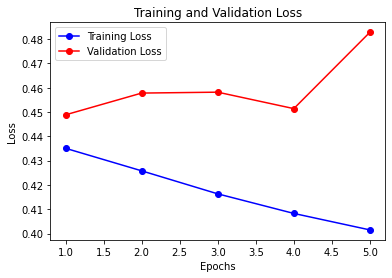

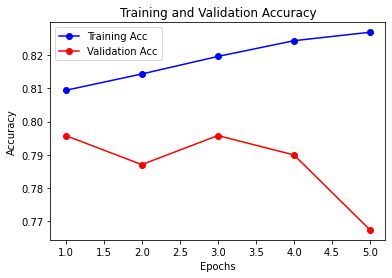

In [ ]:
result_eva(prueba.history['loss'], prueba.history['val_loss'], prueba.history['accuracy'], prueba.history['val_accuracy'])

### Predicting

In [ ]:
#Predicting test data

y_pred = model1.predict([x_test_txt,x_test_key,x_test_loc], batch_size=16, verbose=2)

In [ ]:
y_pred = np.argmax(y_pred,axis=1)

### Creating df for make the submission

In [ ]:
df = pd.DataFrame()
df['id'] = [int(x) for x in id_test.values]
df['target'] = y_pred


In [ ]:
from google.colab import files
df.to_csv('24.submit.csv', index=False)
files.download('24.submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model 2 - LSTM+CNN over [location, text, keyword] - in Kaggle  0.80386



In [ ]:
input1 = Input(shape=(max_words_txt,))
embedding_layer1 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_txt, trainable=False)(input1)
lstm1_1 = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(embedding_layer1)
lstm1_1a = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm1_1)
lstm1_1b = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm1_1a)
res = Reshape((-1, x_train_txt.shape[1], 100))(lstm1_1b)
conv1 = Conv2D(100, (3,3), padding='same',activation="relu")(res)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
flat1 = Flatten()(pool1)

input2 = Input(shape=(max_words_key,))
embedding_layer2 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_key, trainable=False)(input2)
lstm2_1 = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(embedding_layer2)
lstm2_1a = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm2_1)
lstm2_1b = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm2_1a)
res2 = Reshape((-1, x_train_key.shape[1], 100))(lstm2_1b)
conv2 = Conv2D(100, (3,3), padding='same',activation="relu")(res2)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
flat2 = Flatten()(pool2)

input3 = Input(shape=(max_words_loc,))
embedding_layer3 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_loc, trainable=False)(input3)
lstm3_1 = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(embedding_layer3)
lstm3_1a = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm3_1)
lstm3_1b = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm3_1a)
res3 = Reshape((-1, x_train_loc.shape[1], 100))(lstm3_1b)
conv3 = Conv2D(100, (3,3), padding='same',activation="relu")(res3)
pool3 = MaxPooling2D(pool_size=(2,2))(conv3)
flat3 = Flatten()(pool3)

merge = concatenate([flat1, flat2, flat3])

dropout = Dropout(0.4)(merge)
dense1 = Dense(256, activation='relu')(dropout)
dense2 = Dense(128, activation='relu')(dense1)
output = Dense(2, activation='softmax')(dense2)
model2 = Model(inputs=[input1,input2,input3], outputs=output)
model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 25)           0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           (None, 4)            0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 8)            0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 25, 200)      7000000     input_12[0][0]                   
____________________________________________________________________________________________

In [ ]:
optimizer2 = Adam(lr = .0001, beta_1 = .9, beta_2 = .999, epsilon = 1e-10, decay = .0, amsgrad = False)

In [ ]:
model2.compile(loss="binary_crossentropy", optimizer=optimizer2,
              metrics=["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
es = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience = 4)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, 
                                           factor = 0.5, min_lr = 1e-8, cooldown=1)

prueba2 = model2.fit([x_train_txt,x_train_key,x_train_loc], y_train, validation_split=0.2, epochs=3, batch_size=16, verbose=2, callbacks=[es, learning_rate_reduction])

Train on 5503 samples, validate on 1376 samples
Epoch 1/3
 - 91s - loss: 0.3935 - accuracy: 0.8305 - val_loss: 0.4571 - val_accuracy: 0.8045
Epoch 2/3
 - 92s - loss: 0.3895 - accuracy: 0.8357 - val_loss: 0.4533 - val_accuracy: 0.8001
Epoch 3/3
 - 91s - loss: 0.3838 - accuracy: 0.8359 - val_loss: 0.4560 - val_accuracy: 0.7972

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.


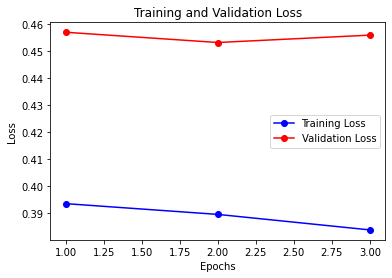

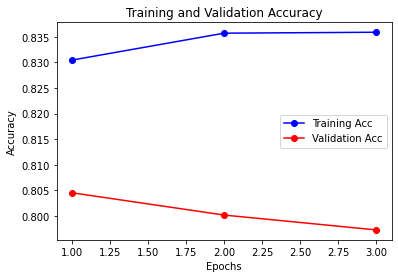

In [ ]:
result_eva(prueba2.history['loss'], prueba2.history['val_loss'], prueba2.history['accuracy'], prueba2.history['val_accuracy'])

In [ ]:
#Predicting test data

y_pred = model2.predict([x_test_txt,x_test_key,x_test_loc], batch_size=16, verbose=2)

In [ ]:
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
df = pd.DataFrame()
df['id'] = [int(x) for x in id_test.values]
df['target'] = y_pred
df.to_csv('23.submit.csv', index=False)

In [ ]:
from google.colab import files
files.download('23.submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>